In [64]:
#!pip install rfpimp
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import mean_squared_error
import rfpimp
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn import tree

In [66]:
df = pd.read_csv('C:/Users/deepa/OneDrive/Desktop/case_study/employee_data/ML case Study.csv')

In [67]:
df.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

In [68]:
df.isnull().sum() #finding the null values

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [7]:
### Dummies (Convert categorical data into numerical data)

In [69]:
df = pd.get_dummies(df, columns=["Role"], prefix = ['Role'], drop_first=True)

In [9]:
df_col = pd.read_csv('C:/Users/deepa/OneDrive/Desktop/case_study/college/Colleges.csv')

In [70]:
Tier1 = df_col['Tier 1'].tolist()
Tier2 = df_col['Tier 2'].tolist()
Tier3 = df_col['Tier 3'].tolist()
# Loading other files and coverting them into dictionaries

In [71]:
df_col.isnull().sum()

Tier 1    6
Tier 2    0
Tier 3    9
dtype: int64

In [72]:
df_col.fillna(value = 0) #Filled null values 

Tier 1                                     Tier 2  \
0                       IIT Bombay                             IIIT Bangalore   
1                        IIT Delhi                                 IIIT Delhi   
2                    IIT Kharagpur                                     IGDTUW   
3                       IIT Madras                                NIT Calicut   
4                       IIT Kanpur                              IIITM Gwalior   
5                      IIT Roorkee                               IIIT Lucknow   
6                     IIT Guwahati                            MNNIT Allahabad   
7                   IIIT Hyderabad                 Punjab Engineering College   
8      BITS Pilani (Pilani Campus)                                     DAIICT   
9                       IIT Indore                                MNIT Jaipur   
10                       IIT Ropar                               NIT Durgapur   
11              IIT BHU (Varanasi)                                VNIT Nagpur   
12                 IIT ISM Dhanbad                                     LNMIIT   
13                             DTU                                  BIT Mesra   
14               NSUT Delhi (NSIT)                                SVNIT Surat   
15       NIT Tiruchipally (Trichy)                              NIT Jalandhar   
16                    NIT Warangal                             NIT Jamshedpur   
17       NIT Surathkal (Karnataka)                            NIT Kurukshetra   
18             Jadavpur University                                  NIT Patna   
19  BITS Pilani (Hyderabad Campus)                                 NIT Raipur   
20        BITS Pilani (Goa Campus)                                 NIT Bhopal   
21                  IIIT Allahabad                               NIT Rourkela   
22                               0                                NIT Silchar   
23                               0                                 NIT Sikkim   
24                               0                              IIIT Jabalpur   
25                               0  Jalpaiguri Government Engineering College   
26                               0                         IIEST/BESU Shibpur   
27                               0                R.V. College of Engineering   

                                            Tier 3  
0       Ramaiah Institute of Technology, Bengaluru  
1                           TIET/Thapar University  
2                              Manipal Main Campus  
3                                      VIT Vellore  
4                                  SRM Main Campus  
5                                KIIT, Bhubaneswar  
6                                 Amity University  
7                           BMS College, Bangalore  
8                        PES University, Bangalore  
9                                      USIT, Delhi  
10                                     MAIT, Delhi  
11                                     MSIT, Delhi  
12      Dayanand College of Engineering, Bangalore  
13       Heritage Institute of Technology, Kolkata  
14                                    IEM, Kolkata  
15                           Techno India, Kolkata  
16                                   Jaypee, Noida  
17                   Amrita University, Coimbatore  
18  Cummins College of Engineering for Women, Pune  
19                                               0  
20                                               0  
21                                               0  
22                                               0  
23                                               0  
24                                               0  
25                                               0  
26                                               0  
27                                               0

In [73]:
for item in df.College:
    if item in Tier1:
        df['College'].replace(item, 1, inplace = True)
    elif item in Tier2:
        df['College'].replace(item, 2, inplace = True)
    elif item in Tier3:
         df['College'].replace(item, 3, inplace = True)

In [74]:
##Importing city data and converting that into dictionary

In [75]:
df_city = pd.read_csv('C:/Users/deepa/OneDrive/Desktop/case_study/city/cities.csv')

In [76]:
df_city.isnull().sum()

Metrio City         0
non-metro cities    1
dtype: int64

In [77]:
df_city.fillna(value = 0)

Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode
5   Hyderabad  Rajpur Sonarpur
6   Ahmedabad         Kolhapur
7        Pune            Ajmer
8       Surat                0

In [78]:
Metro = df_city['Metrio City'].tolist()
N_metro =  df_city['non-metro cities'].tolist()

In [79]:
for i in df.City:
    if i in Metro :
        df['City'].replace(i, 1, inplace = True)
    elif i in N_metro:
        df['City'].replace(i, 0, inplace = True)

In [80]:
df.describe()

College         City  Previous CTC  Previous job change  \
count  1589.000000  1589.000000   1589.000000          1589.000000   
mean      1.975456     0.514160  55518.453744             2.528634   
std       0.838330     0.499957   6655.218445             1.123918   
min       1.000000     0.000000  36990.000000             1.000000   
25%       1.000000     0.000000  50518.000000             2.000000   
50%       2.000000     1.000000  55291.000000             3.000000   
75%       3.000000     1.000000  60109.000000             4.000000   
max       3.000000     1.000000  77911.000000             4.000000   

       Graduation Marks  EXP (Month)            CTC  
count       1589.000000  1589.000000    1589.000000  
mean          59.855255    39.044682   75353.278798  
std           14.935139    14.108875   12587.288237  
min           35.000000    18.000000   53020.320000  
25%           46.000000    26.000000   66902.350000  
50%           60.000000    39.000000   73028.670000  
75%           73.000000    51.000000   80588.670000  
max           85.000000    64.000000  123416.990000

In [81]:
""""Description of headers

1. COLLEGE - Tier1,Tier2, Tier3(Tier1 owns maximum value and Tier3 is least value)
2. CITY - Metro City or Non Metro City
3. Previous CTC - Previous Salary of the member
4. PREVIOUS JOB CHANGE - How man job changes earlier
5. GRADUATION MARK - Marks obtain in graduation
6. EXP(Month) - Experience in Month
7. Role_Manager - job role (if job is manager than 1 otherwise 0)
"""

'"Description of headers\n\n1. COLLEGE - Tier1,Tier2, Tier3(Tier1 owns maximum value and Tier3 is least value)\n2. CITY - Metro City or Non Metro City\n3. Previous CTC - Previous Salary of the member\n4. PREVIOUS JOB CHANGE - How man job changes earlier\n5. GRADUATION MARK - Marks obtain in graduation\n6. EXP(Month) - Experience in Month\n7. Role_Manager - job role (if job is manager than 1 otherwise 0)\n'

In [82]:
## Pair wise relation between variable

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


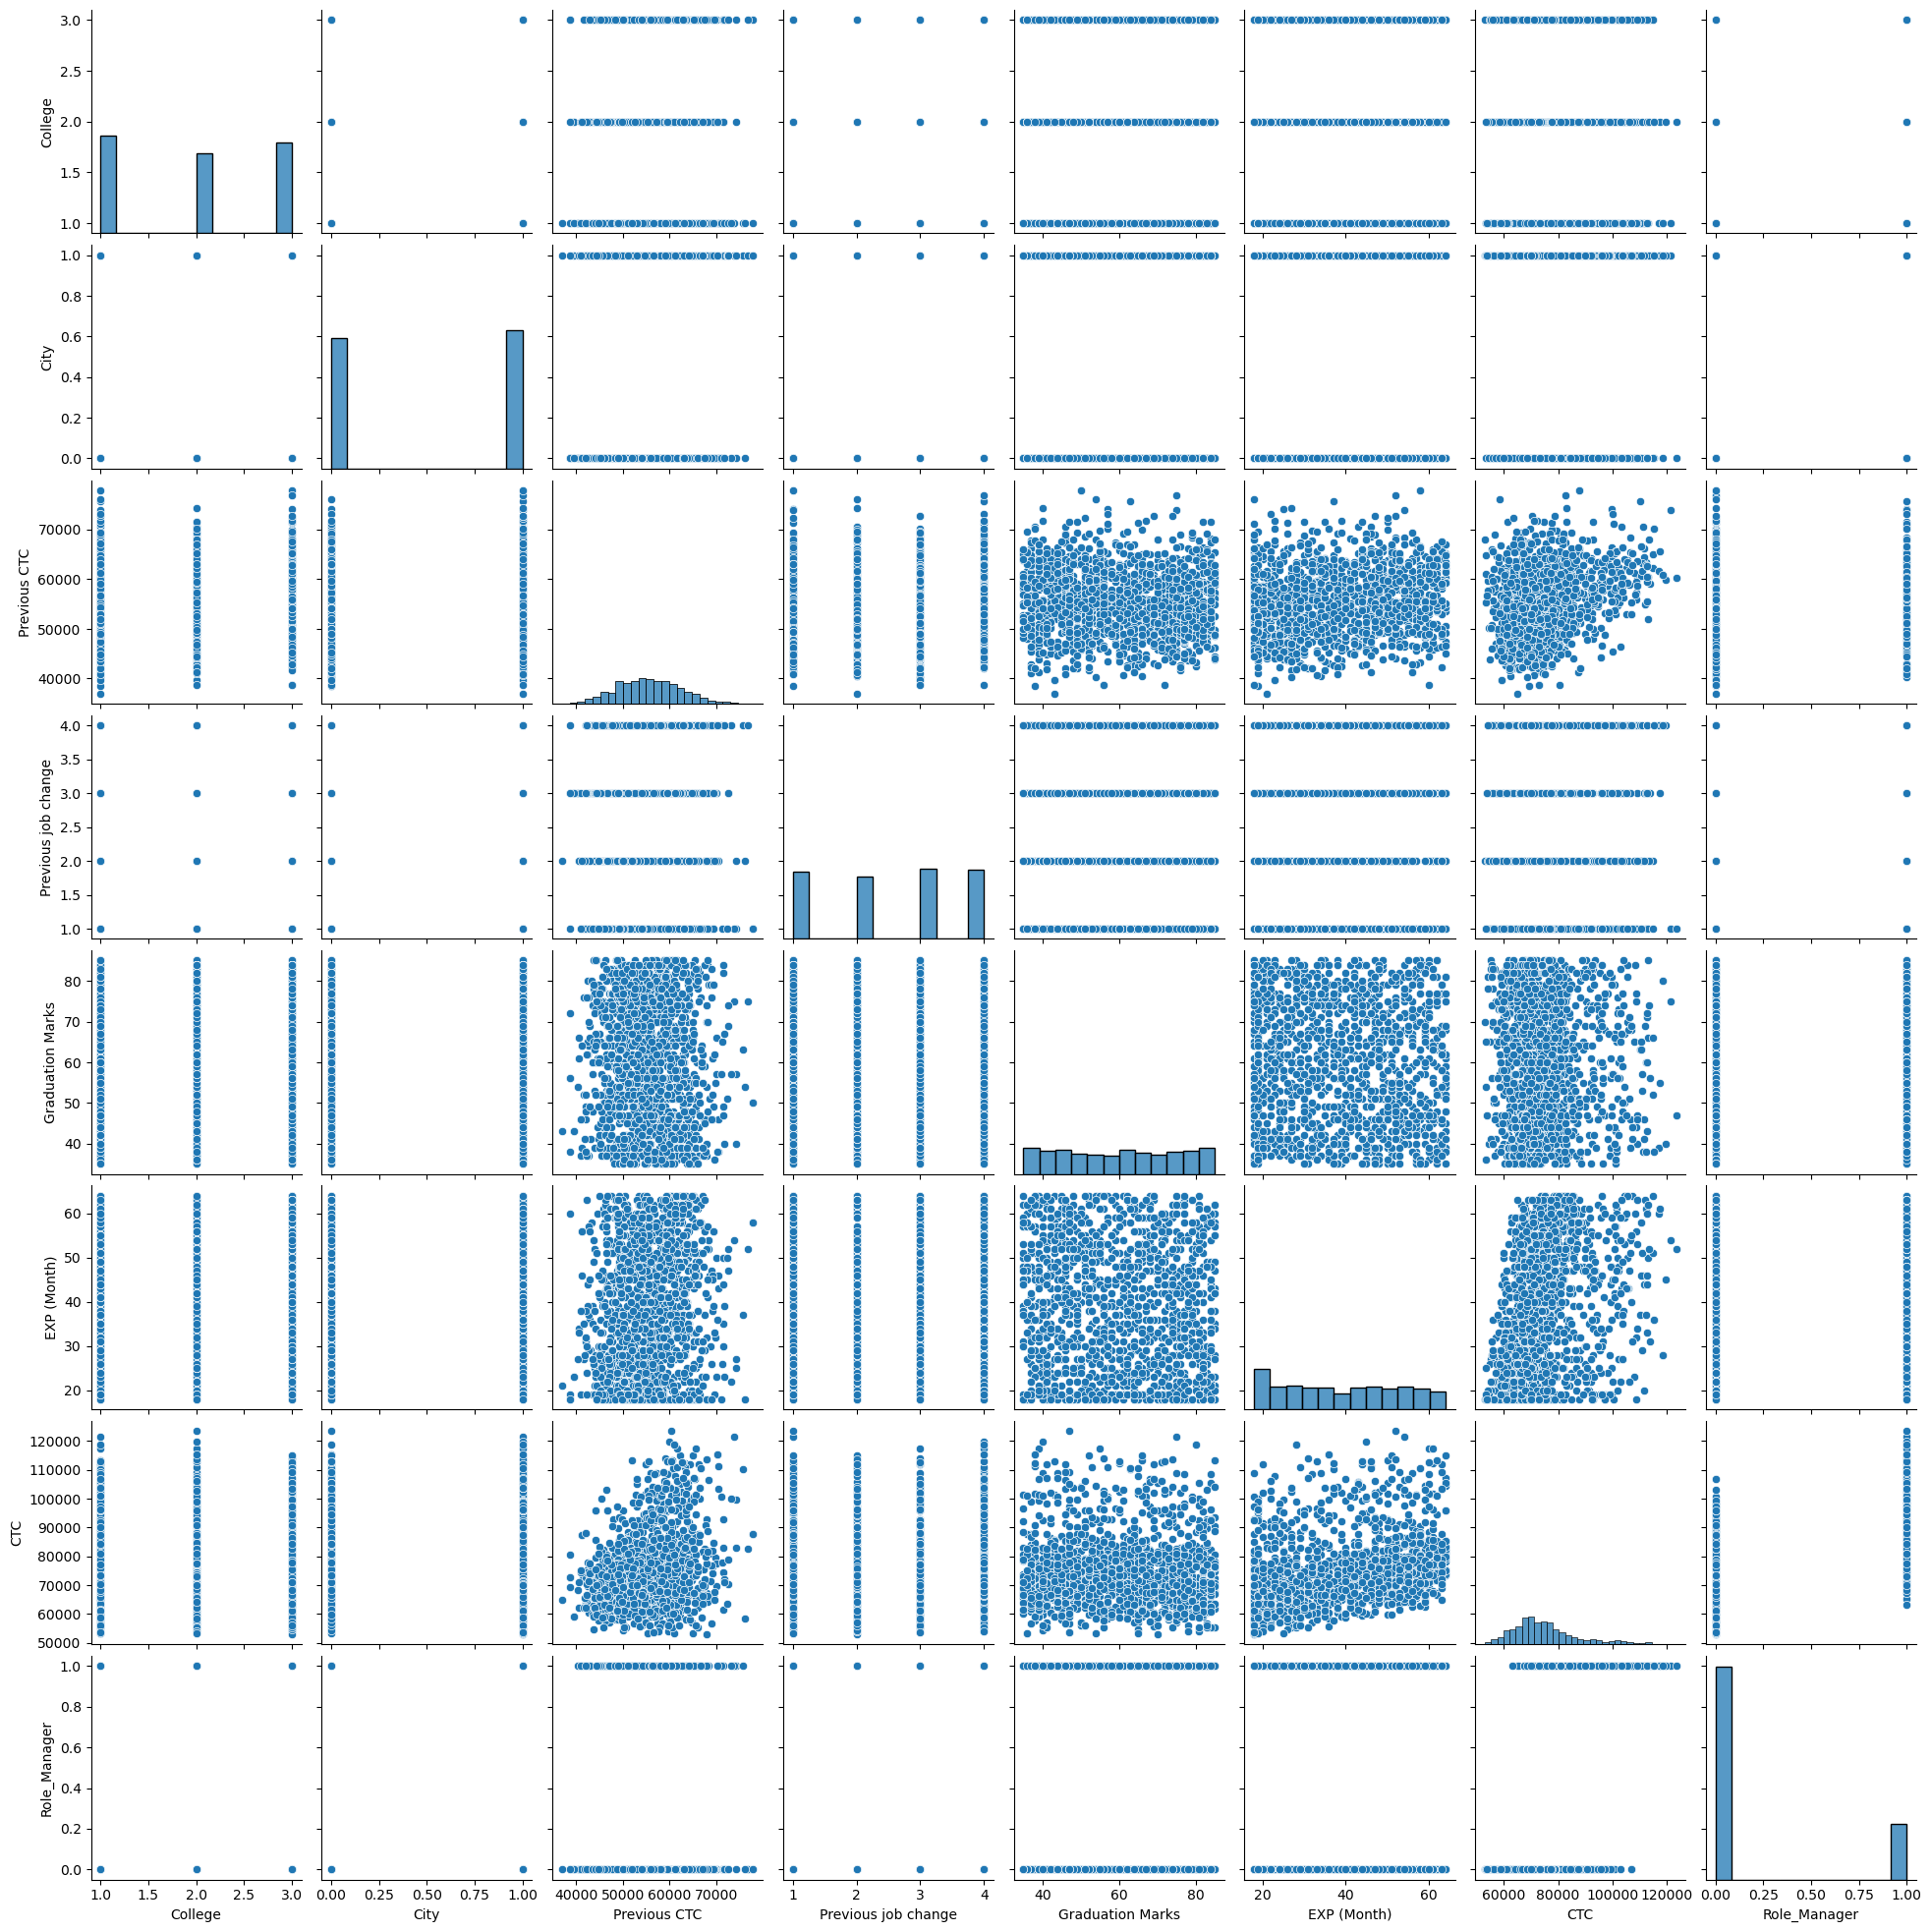

In [83]:
sns.pairplot(df) # Visualisation of the relation between diffrent variables given in the dataset
plt.show()

In [84]:
## Test Train split

In [85]:
x = df.drop('CTC', axis = 1)

In [86]:
y = df['CTC']

In [87]:
x_test, x_train, y_test, y_train = train_test_split(x,y,test_size = 0.2, random_state = 0)
#Splitting data into train and test data

In [88]:
## 1. Regressive Model using Linear Regression

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(x_train, y_train)

LinearRegression()

In [91]:
coeffecients = pd.DataFrame(lr.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients
#Getting Cofficient of every Independent variable

Coeffecient
College               -735.918186
City                 -1983.210410
Previous CTC             0.318233
Previous job change    310.652644
Graduation Marks        -8.912209
EXP (Month)            273.952606
Role_Manager         20368.238509

In [92]:
lr.intercept_ #Intercept value

45104.03547302957

In [93]:
# Prediction on Test data

In [94]:
prediction = lr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

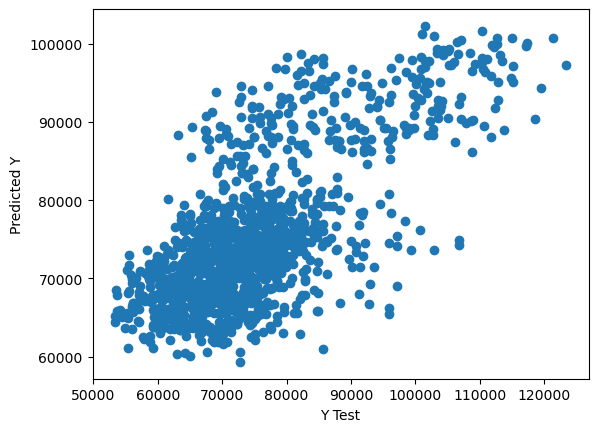

In [95]:
plt.scatter(y_test, prediction) #Scatter plot graph of test and predicted data
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [96]:
# Evaluating the model

In [97]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE :'," ", metrics.mean_absolute_error(y_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(y_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R2_score:', r2_score(y_test,prediction))

MAE :   6948.784319555939
MSE :   78264356.9961959
RMAE :   8846.7144746621
R2_score: 0.5133688483968826


C:\Users\deepa\AppData\Local\Temp\ipykernel_9972\1174170705.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - prediction, bins=50)


<Axes: xlabel='CTC', ylabel='Density'>

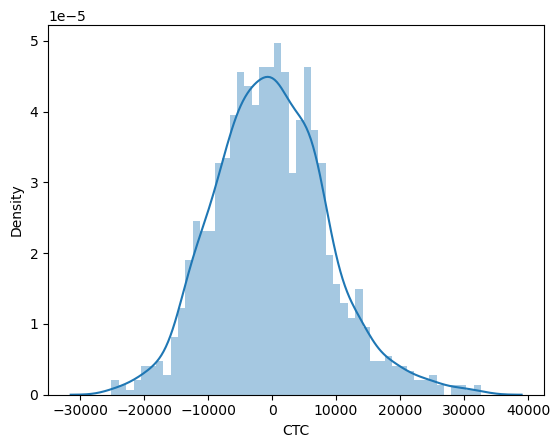

In [98]:
sns.distplot(y_test - prediction, bins=50)

In [99]:
#print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred_tree))

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
reg_tree = DecisionTreeRegressor(criterion = "squared_error", max_depth = 10,min_samples_split = 10, random_state = 5)

In [102]:
reg_tree.fit(x_train, y_train)
reg_tree.fit(x_test, y_test)
#Fitting the train and test data

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [103]:
y_pred_tree = reg_tree.predict(x_test) #Predicting the CTC

In [104]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred_tree))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred_tree))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_tree)))
print('R2_score:', r2_score(y_test,y_pred_tree))

MAE :   4136.10083033373
MSE :   28945037.05760771
RMAE :   5380.059205771598
R2_score: 0.8200259063366075


Text(0, 0.5, 'y_pred_tree')

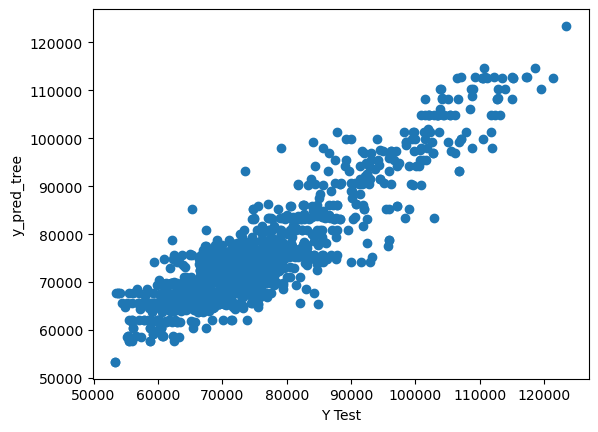

In [105]:
plt.scatter(y_test, y_pred_tree)
plt.xlabel('Y Test')
plt.ylabel('y_pred_tree')
# Visualisation through scatter plot

C:\Users\deepa\AppData\Local\Temp\ipykernel_9972\4196277517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred_tree, bins=50)


<Axes: xlabel='CTC', ylabel='Density'>

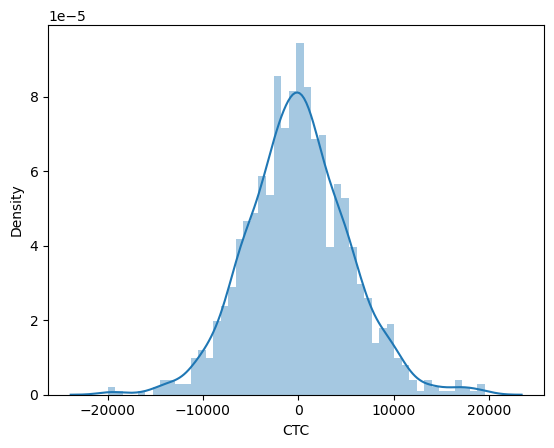

In [106]:
sns.distplot(y_test - y_pred_tree, bins=50)

In [107]:
dot_data = tree.export_graphviz(reg_tree, feature_names = x_test.columns, filled = True)

In [108]:
from IPython.display import Image

In [109]:
#!pip install pydotplus
import pydotplus

In [110]:
graph = pydotplus.graph_from_dot_data(dot_data)


(process:17240): GLib-GIO-WARNING **: 00:21:23.484: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.1011.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs

(process:17240): GLib-GIO-WARNING **: 00:21:23.596: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2310.54.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:17240): GLib-GIO-WARNING **: 00:21:23.619: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



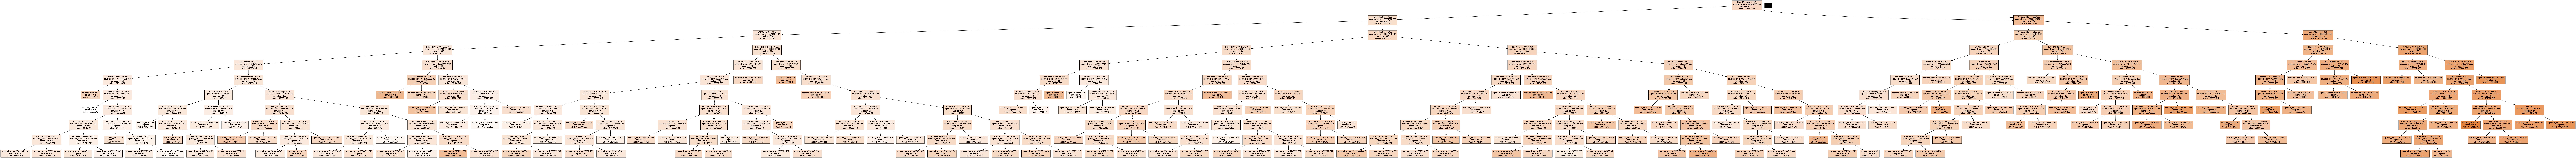

In [111]:
Image(graph.create_png())


In [112]:
## 3. Regressive using stats model

In [113]:
x_train  = sn.add_constant(x_train) #Adding constant in the stats_model

In [115]:
model = sn.OLS(y_train, x_train.astype(float))

In [116]:
results = model.fit() #Fitting the model

In [117]:
results.summary() #Summary of the OLS regressive model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     55.35
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           5.59e-51
Time:                        00:23:31   Log-Likelihood:                -3313.9
No. Observations:                 318   AIC:                             6644.
Df Residuals:                     310   BIC:                             6674.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 4.51e+04   4958.967      9.095      0.000    3.53e+04    5.49e+04
College              -735.9182    558.896     -1.317      0.189   -1835.628     363.792
City                -1983.2104    939.889     -2.110      0.036   -3832.579    -133.842
Previous CTC            0.3182      0.073      4.381      0.000       0.175       0.461
Previous job change   310.6526    409.068      0.759      0.448    -494.248    1115.553
Graduation Marks       -8.9122     31.599     -0.282      0.778     -71.087      53.263
EXP (Month)           273.9526     33.599      8.154      0.000     207.843     340.063
Role_Manager         2.037e+04   1161.754     17.532      0.000    1.81e+04    2.27e+04
==============================================================================
Omnibus:                        4.073   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                3.954
Skew:                           0.273   Prob(JB):                        0.138
Kurtosis:                       3.026   Cond. No.                     6.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
# K_Nearest_Neighbour_Model

In [119]:
from sklearn.neighbors import KNeighborsRegressor

In [120]:
reg_knn = KNeighborsRegressor()

In [121]:
reg_knn.fit(x_train, y_train)
reg_knn.fit(x_test, y_test)

KNeighborsRegressor()

In [122]:
y_pred_knn = reg_knn.predict(x_test)

In [123]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred_knn))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred_knn))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_knn)))
print('R2_score:', r2_score(y_test,y_pred_knn))

MAE :   7631.3812431156575
MSE :   104068229.16653718
RMAE :   10201.383688820708
R2_score: 0.35292585094552487


Text(0, 0.5, 'y_pred_knn')

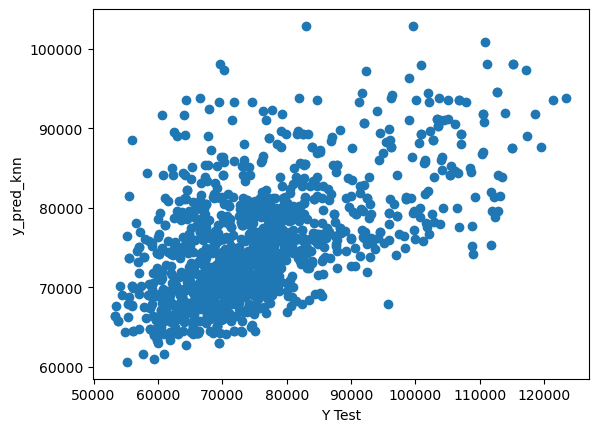

In [124]:
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Y Test')
plt.ylabel('y_pred_knn')

C:\Users\deepa\AppData\Local\Temp\ipykernel_9972\59507788.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred_knn, bins=50)


<Axes: xlabel='CTC', ylabel='Density'>

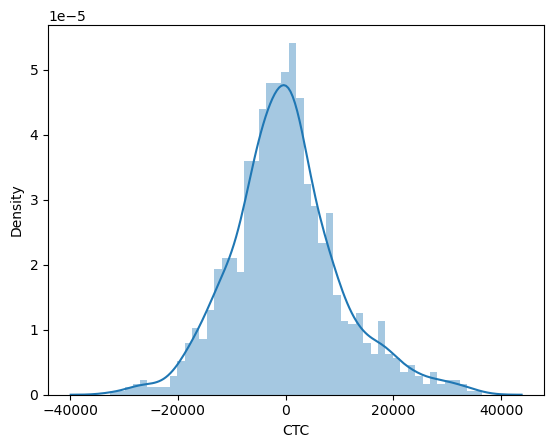

In [125]:
sns.distplot(y_test - y_pred_knn, bins=50)

In [126]:
#Random_forest_model

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
reg_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [129]:
reg_rf.fit(x_train, y_train)
reg_rf.fit(x_test, y_test)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [130]:
y_pred_rf = reg_rf.predict(x_test)

In [133]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred_rf))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred_rf))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))
print('R2_score:', r2_score(y_test,y_pred_rf))

MAE :   2175.3910747128284
MSE :   7926919.654295916
RMAE :   2815.4785835264165
R2_score: 0.9507120969482583


Text(0, 0.5, 'y_pred_rf')

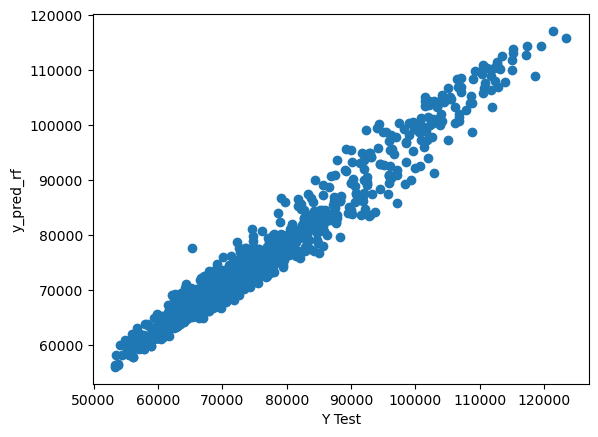

In [134]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Y Test')
plt.ylabel('y_pred_rf')

C:\Users\deepa\AppData\Local\Temp\ipykernel_9972\59507788.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred_knn, bins=50)


<Axes: xlabel='CTC', ylabel='Density'>

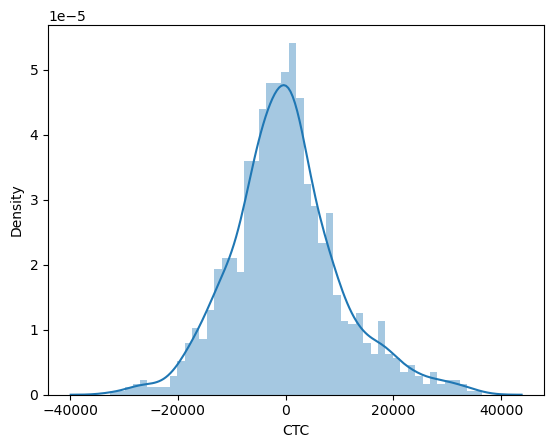

In [135]:
sns.distplot(y_test - y_pred_knn, bins=50)

In [136]:
# 6.Ridge_Lasso_Regression_Model

In [137]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [138]:
reg_ridge = Ridge()

In [139]:

param = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1,5,10,20,30,35,40,45,50,55,100]}
ridge_reg = GridSearchCV(reg_ridge , param, scoring = "neg_mean_squared_error", cv=5)
ridge_reg.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 1, 5, 10, 20, 30,
                                   35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [140]:
print (ridge_reg.best_params_)
print (ridge_reg.best_score_)

{'alpha': 0.001}
-74088200.79173608


In [141]:
from sklearn.linear_model import Lasso

In [142]:
reg_lass = Lasso()

In [143]:
lass_reg = GridSearchCV(reg_lass , param, scoring = "neg_mean_squared_error", cv=5)
lass_reg.fit(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.594e+10, tolerance: 1.961e+07
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.745e+10, tolerance: 2.043e+07
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.847e+10, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 1, 5, 10, 20, 30,
                                   35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [144]:
print (lass_reg.best_params_)
print (lass_reg.best_score_)

{'alpha': 20}
-74078748.9503504


In [145]:
# Evaluation_Ridge_Lasso_Regression

In [146]:
prediction_ridge = ridge_reg.predict(x_test)
prediction_lasso = lass_reg.predict(x_test)

In [147]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,prediction_ridge ))
print('MSE :'," ", metrics.mean_squared_error(y_test,prediction_ridge ))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,prediction_ridge )))
print('R2_score:', r2_score(y_test,prediction_ridge ))

MAE :   6854.385459284076
MSE :   75200815.80373397
RMAE :   8671.840393119212
R2_score: 0.5324172969587713


C:\Users\deepa\AppData\Local\Temp\ipykernel_9972\4006074281.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test -prediction_ridge , bins=50)


<Axes: xlabel='CTC', ylabel='Density'>

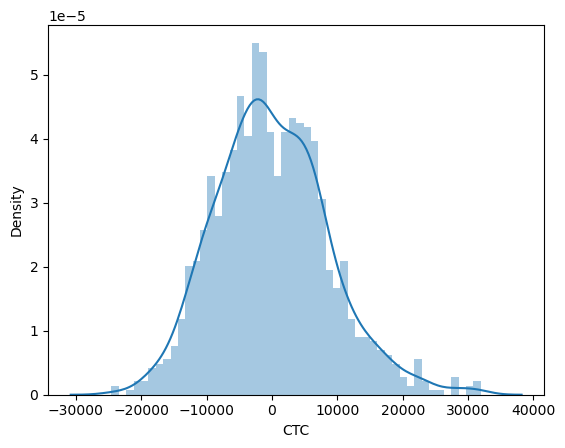

In [148]:
sns.distplot(y_test -prediction_ridge , bins=50)

C:\Users\deepa\AppData\Local\Temp\ipykernel_9972\1870982444.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test -prediction_lasso , bins=50)


<Axes: xlabel='CTC', ylabel='Density'>

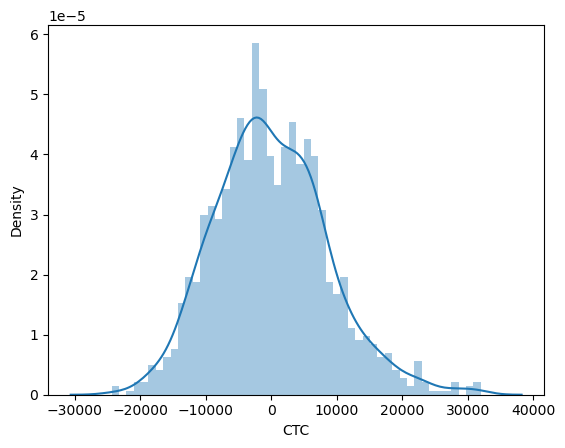

In [149]:
sns.distplot(y_test -prediction_lasso , bins=50)

In [150]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,prediction_lasso))
print('MSE :'," ", metrics.mean_squared_error(y_test,prediction_lasso))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,prediction_lasso)))
print('R2_score:', r2_score(y_test,prediction_lasso))

MAE :   6856.444937498802
MSE :   75213970.53074402
RMAE :   8672.59883372591
R2_score: 0.5323355036597575


In [151]:
# 7.Xgboost_regressive_Model

In [153]:
from xgboost import XGBRegressor

In [155]:
reg_xg = XGBRegressor()

In [156]:
reg_xg.fit(x_train, y_train)
reg_xg.fit(x_test, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [157]:
y_pred_xg = reg_xg.predict(x_test)

In [158]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred_xg))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred_xg))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_xg)))
print('R2_score:', r2_score(y_test,y_pred_xg))

MAE :   1097.9095008851298
MSE :   2324135.4664049353
RMAE :   1524.5115501054545
R2_score: 0.985549019222719


C:\Users\deepa\AppData\Local\Temp\ipykernel_9972\1805189984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test -y_pred_xg, bins=50)


<Axes: xlabel='CTC', ylabel='Density'>

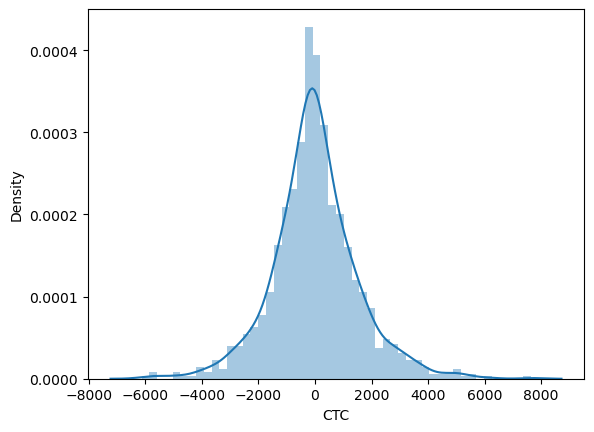

In [159]:
sns.distplot(y_test -y_pred_xg, bins=50)

Text(0, 0.5, 'y_pred_xg')

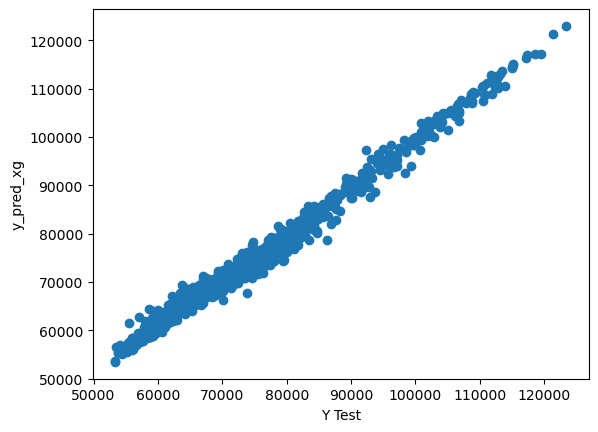

In [160]:
plt.scatter(y_test, y_pred_xg)
plt.xlabel('Y Test')
plt.ylabel('y_pred_xg')

In [162]:
# Project_Task :

In [165]:

# 1. The project was quite challenging as well as full of learning curve 
#    as I used all my skills which I have learned in the Machine learning Python course. 
#    The data contain categorical as well as numerical data so i followed your guidance and 
#    converted those categorical data into numbers by using different method as explained below:


In [167]:
# 2. First of all I loaded the ML CASE STUDY CSV data, colleges and cities data and completed the pre-processing task like eliminating outliers and converting theses into dictionaries. .
#    In college data, i used 0 to that cell which do not have any value with the use of fillna method.
#    for city, i used numeric value of 0 to the metro city and 1 to the non metro city. As we know that we can not work on the categorial data in 
#    machine learning so i convert it as per guidelines, for doing this numeric value, i run a for loop and convert it.
# 
#   After which i used diffrent REGRESSIVE MODEL to predit the Mean Squared Error and other evaluation bases

In [168]:
# 3. I have use many MULTIPLE REGRESSOR like :- 
#    REGRESSIVE MODEL, STASTICAL OLS MODEL, DECISION TREE MODEL, KNN MODEL, RANDOM FOREST, RIDGE LASSO REGRESSION MODEL and XGBOOST MODEL
# I used train_test_split on basis of the 80 to 20 ratio. As we know that, we should train 80 % data and go to the 20% on test. 

In [169]:
# 4. Following are the outcomes of different Regressive Models :

In [170]:
data = {'Model':['Multiple Regressive Model', 'Decision Tree Model', 'KNN Model', 'Random Forest', 'Ridge Regression', 'Lasso Regression', 'Xgboost Model'],
        'MSE': [metrics.mean_squared_error(y_test,prediction),metrics.mean_squared_error(y_test,y_pred_tree), metrics.mean_squared_error(y_test,y_pred_knn), metrics.mean_squared_error(y_test,y_pred_rf), metrics.mean_squared_error(y_test,prediction_ridge ), metrics.mean_squared_error(y_test,prediction_lasso), metrics.mean_squared_error(y_test,y_pred_xg)],
      'R2_score': [r2_score(y_test,prediction), r2_score(y_test,y_pred_tree),  r2_score(y_test,y_pred_knn), r2_score(y_test,y_pred_rf), r2_score(y_test,prediction_ridge ), r2_score(y_test,prediction_lasso), r2_score(y_test,y_pred_xg)]}

In [171]:
df_evaluation = pd.DataFrame(data)

In [172]:
df_evaluation

Model           MSE  R2_score
0  Multiple Regressive Model  7.826436e+07  0.513369
1        Decision Tree Model  2.894504e+07  0.820026
2                  KNN Model  1.040682e+08  0.352926
3              Random Forest  7.926920e+06  0.950712
4           Ridge Regression  7.520082e+07  0.532417
5           Lasso Regression  7.521397e+07  0.532336
6              Xgboost Model  2.324135e+06  0.985549

In [173]:
# As we can observe in above dataframe that XGBOOOST REGRESSION MODEL has the LEAST MEAN SQUARED ERROR(MSE).
# As we know that range between 0.4 to 0.8 of R2_Score is a good model and the value of this is near by 0.8 so highest R2_SCORE in decision tree model 
# and NORMAL DISTRIBUTION OF HISTOGRAM which can be oberserved in the graphs 
# so second best model is DECISION TREE MODEL .

In [ ]:
#5. This XGBOOST REGRESSION MODEL is showing 0.99 R2_score which is excellent and least MSE , 
#   hence this is almost perfect but this can be further imporved by predicting the use of EARLY STOPPING ,
#   XGBoost supports early stopping which allows you to specify a validation set and stop training the model 
#   when the error on the validation set stops improving. This can help prevent overfitting and improve the generalization of the model.
